## Import Libraries

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pickle

In [98]:
# Import Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression            # linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge     # Ridge Regression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.ensemble import HistGradientBoostingRegressor    # Boosting Regressor
from sklearn.ensemble import RandomForestRegressor            # Random Forest
from bokeh.plotting import figure, show


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier

In [57]:
# allows me to view the whole list of columns
# Set option to display all rows (if your output from isna().sum() is very long)
pd.set_option('display.max_rows', None)

# Setting df head to all show all columns
pd.set_option('display.max_columns', None)

## Load The Data

In [4]:
crete = pd.read_csv('concrete.csv')

In [7]:
crete.shape

(1030, 10)

In [8]:
crete.isna().sum()

,0
Unnamed: 0,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,379
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,0


In [9]:
crete.describe()

,Unnamed: 0,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,651.000000,1030.000000,1030.000000,1030.000000
mean,514.500000,281.167864,73.895825,54.188350,181.567282,9.816897,972.918932,773.580485,35.817961
std,297.479691,104.506364,86.279342,63.997004,21.354219,4.580328,77.753954,80.175980,16.705742
min,0.000000,102.000000,0.000000,0.000000,121.800000,1.700000,801.000000,594.000000,2.330000
25%,257.250000,192.375000,0.000000,0.000000,164.900000,6.950000,932.000000,730.950000,23.710000
50%,514.500000,272.900000,22.000000,0.000000,185.000000,9.400000,968.000000,779.500000,34.445000
75%,771.750000,350.000000,142.950000,118.300000,192.000000,11.600000,1029.400000,824.000000,46.135000
max,1029.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,82.600000


In [10]:
crete.columns

Index(['Unnamed: 0', 'Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
       'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [11]:
crete.head()

,Unnamed: 0,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,2,332.5,142.5,0.0,228.0,NaN,932.0,594.0,270,40.27
3,3,332.5,142.5,0.0,228.0,NaN,932.0,594.0,365,41.05
4,4,198.6,132.4,0.0,192.0,NaN,978.4,825.5,360,44.30


## Visualization before Cleaning

<Axes: ylabel='Count'>

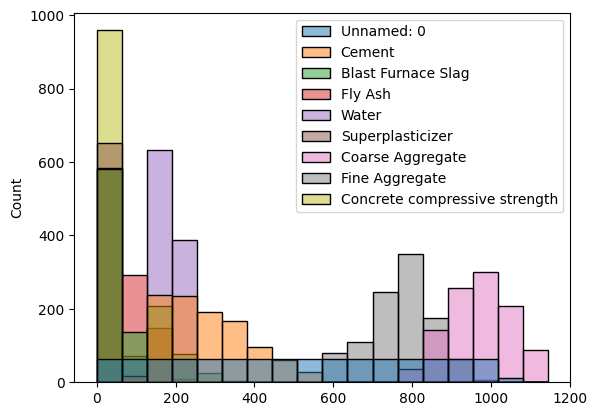

In [13]:
# Shows all the columns in concrete dataset
sns.histplot(data=crete,
                )

<Axes: ylabel='Superplasticizer'>

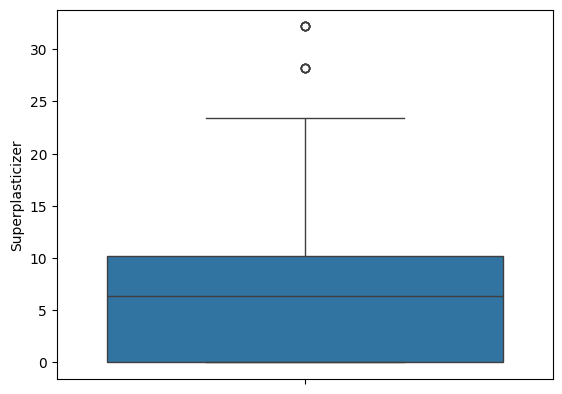

In [52]:
# find how many outliers there in the dataset
sns.boxplot(crete['Superplasticizer'])

In [ ]:
# Created subsets of Columns with only outliers
crete_out = crete[['Superplasticizer','Blast Furnace Slag','Water','Fine Aggregate','Concrete compressive strength']]

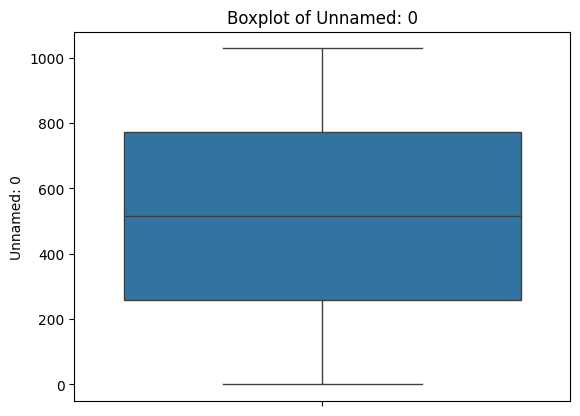

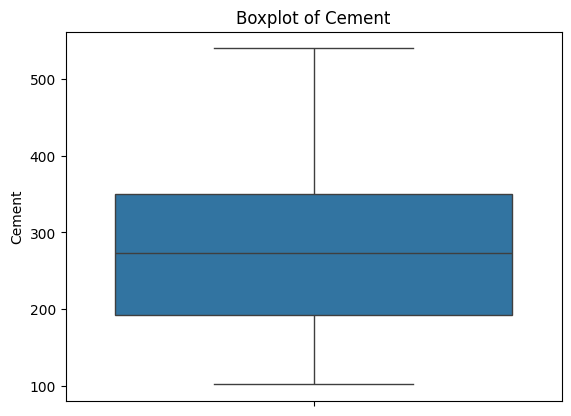

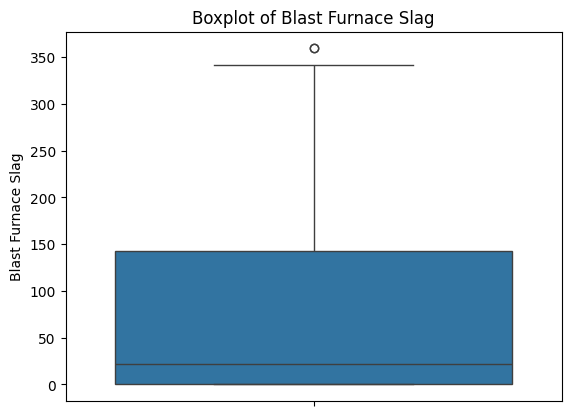

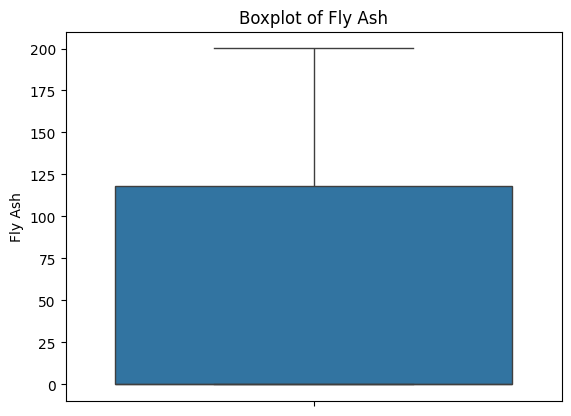

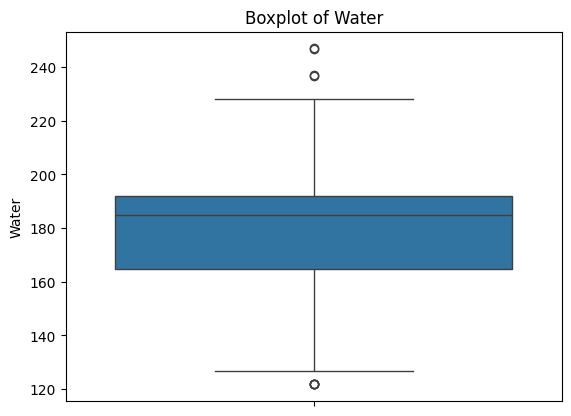

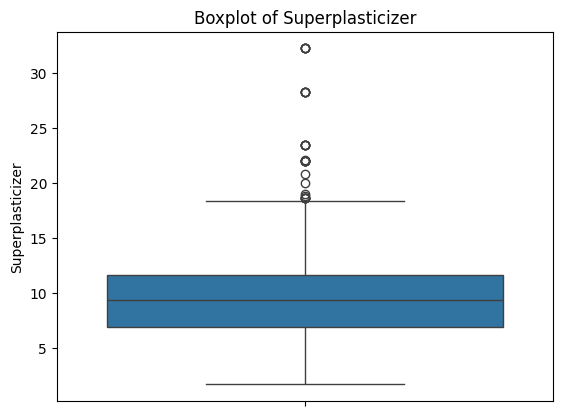

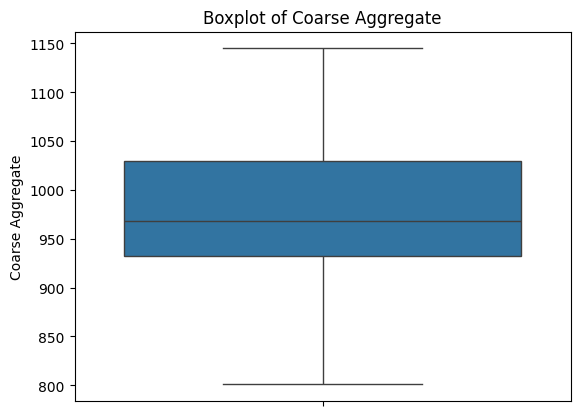

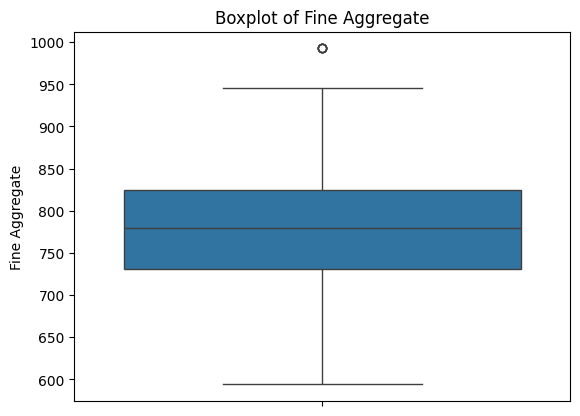

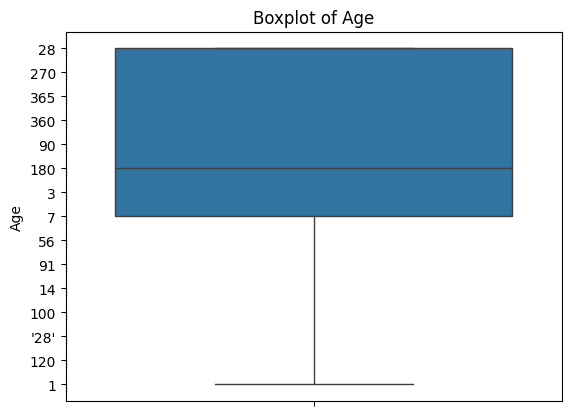

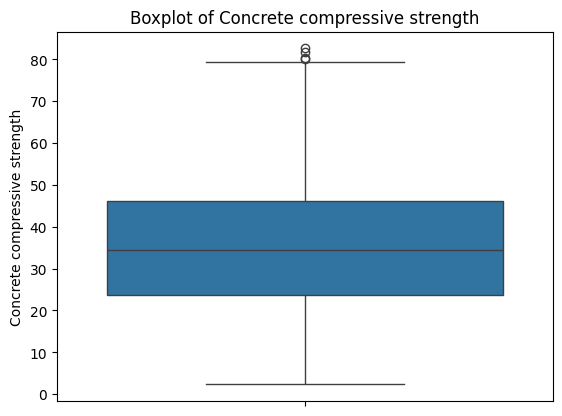

In [18]:
# Create a for loop that, loops through the concrete columns and prints out all columns using seaborn to display outliers
for i in crete:
  sns.boxplot(crete[i])
  plt.title(f'Boxplot of {i}') # Add a title to each plot
  plt.show() # Display each plot

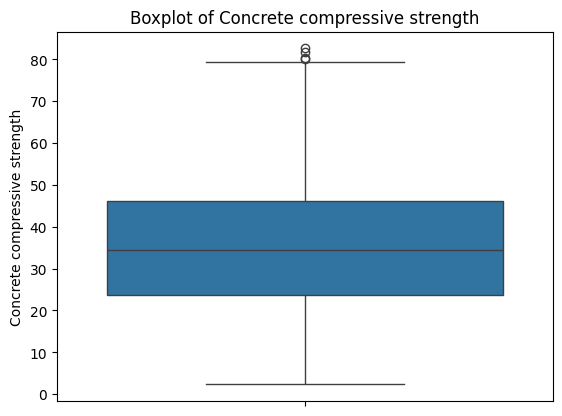

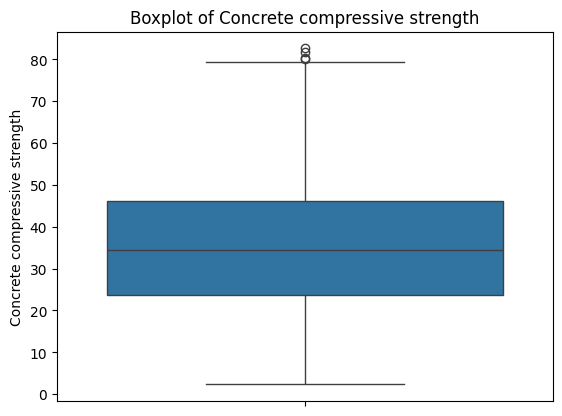

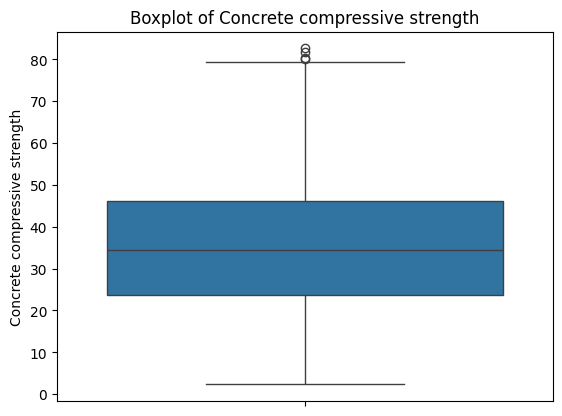

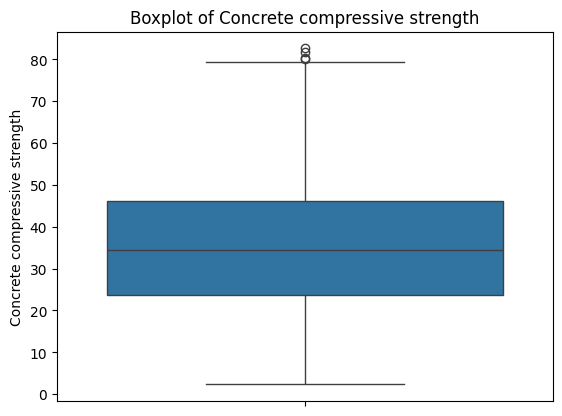

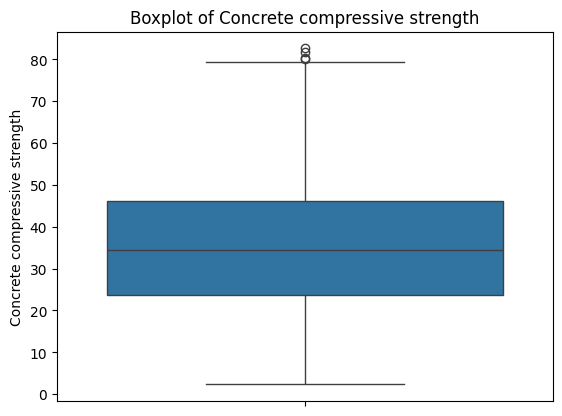

In [23]:
# Create a for loop with only the columns with outliers
for j in crete_out:
  sns.boxplot(crete_out[i])
  plt.title(f'Boxplot of {i}')
  plt.show()

## Data Cleaning

In [24]:
# Put all numerica columns into a list
numeric_columns = crete.select_dtypes(include=['int64','float64']).columns.tolist()

In [25]:
# Put all the categorical columns into a list
category_columns = crete.select_dtypes(include=['object']).columns.tolist()

In [31]:
# Detect Outliers
Q1 = crete[numeric_columns].quantile(0.25)
Q3 = crete[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean DataFrame where True means the value is NOT an outlier within its column
is_not_outlier = (crete[numeric_columns] >= lower_bound) & (crete[numeric_columns] <= upper_bound)

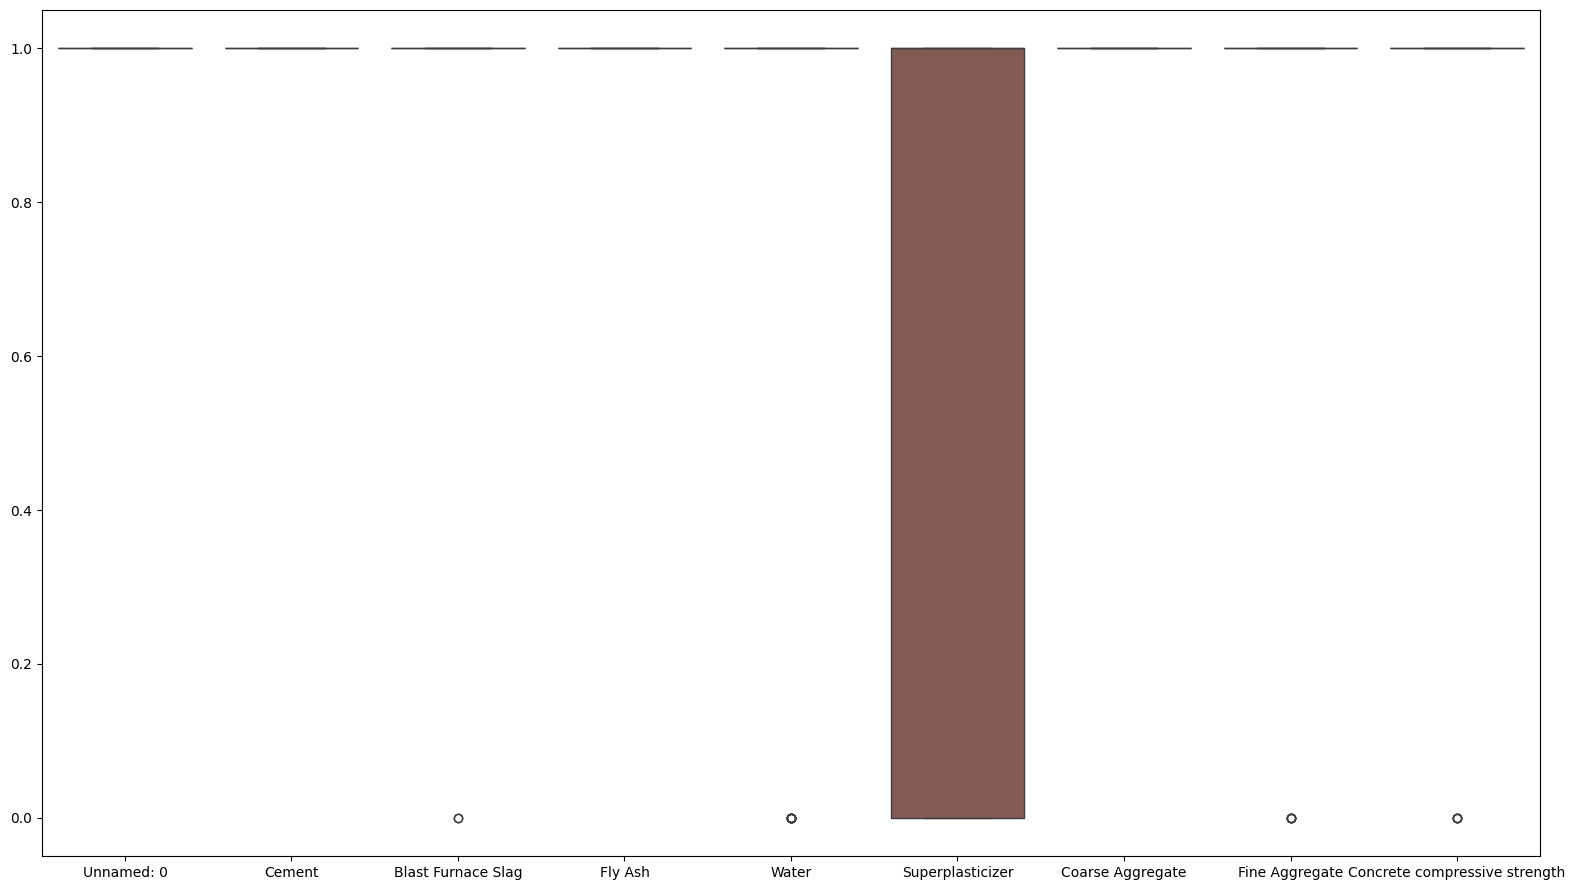

In [49]:
# Show all the outliers in crete dataset
fig, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(data=is_not_outlier)
plt.tight_layout()

In [68]:
# Drop 'Unnamed: 0' column  -- not needed for this analysis

# df.drop(columns=['column_name'], axis=1)
crete.drop(columns=['Unnamed: 0'], inplace=True)

In [47]:
# Remove the NaN values in 'Superplasticizer'
crete['Superplasticizer'] = crete['Superplasticizer'].fillna(0)

#### Final Check

In [69]:
# Check to see if 'Unnamed: 0' was removed -- It was!
crete.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [67]:
# Triple check if its dataset -- It not, we are good!
crete.head()

,Unnamed: 0,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [50]:
# Check if all the NaN value were removed -- they are, we are good!
crete.isna().sum()

,0
Unnamed: 0,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,0


## Visualizen after Cleaning

<Axes: ylabel='Superplasticizer'>

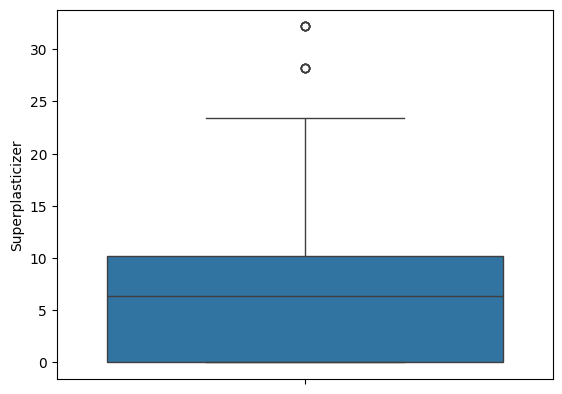

In [53]:
# find how many outliers there in the dataset AFTER cleaning
sns.boxplot(crete['Superplasticizer'])

<Axes: ylabel='Count'>

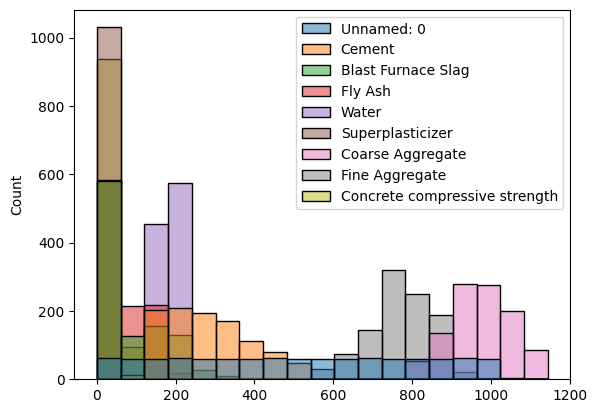

In [54]:
# Shows all the columns in concrete dataset
sns.histplot(data=crete)

<Axes: ylabel='Count'>

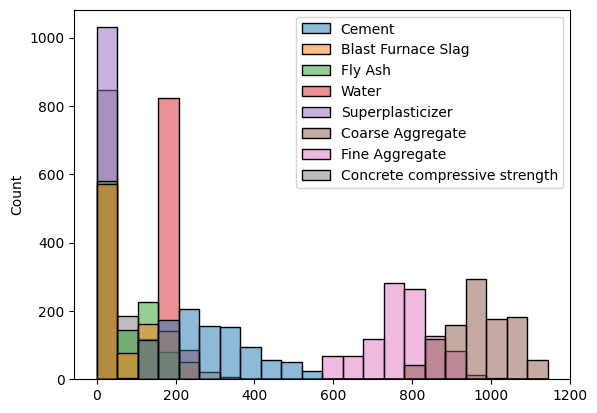

In [71]:
# Check if the dataset has changes AFTER cleaning
sns.histplot(data=crete)

ValueError: Plotly Express cannot process wide-form data with columns of different type.

## EDA

In [73]:
crete.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

This scatterplot shows the 'Cement' and 'Concrete compressive strength'. This graph shows that strength of the Concrete, it shows the cement streght is best between less than 250  between 20% and 40%

In [78]:
fig = px.scatter(crete,
             x='Concrete compressive strength',
             y='Cement'
               )
fig.show()

In [79]:
fig = px.scatter(crete,
             x='Cement',
             y='Concrete compressive strength'
            )
fig.show()

In [80]:
crete.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

From this histogram, it suggest that there are a few strength, 160, 220 and 380. Anything past 390 looks to very low in strength.

In [84]:
fig = px.histogram(crete,
             x='Cement',
             y='Concrete compressive strength'

            )
fig.show()

This is a 3d of water superplasticizer and concrete strength,

In [86]:
fig = px.scatter_3d(crete_cleaned,
                    x='Water',
                    y='Superplasticizer',
                    z='Concrete compressive strength',
                    title='3D Scatter Plot of Water, Superplasticizer, and Concrete Compressive Strength')
fig.show()

From this graph, it suggest that Super plasticizer is stronger around 7.5 and 12.5 (oz?) and at most 190 (oz?) of water

<Axes: xlabel='Water', ylabel='Superplasticizer'>

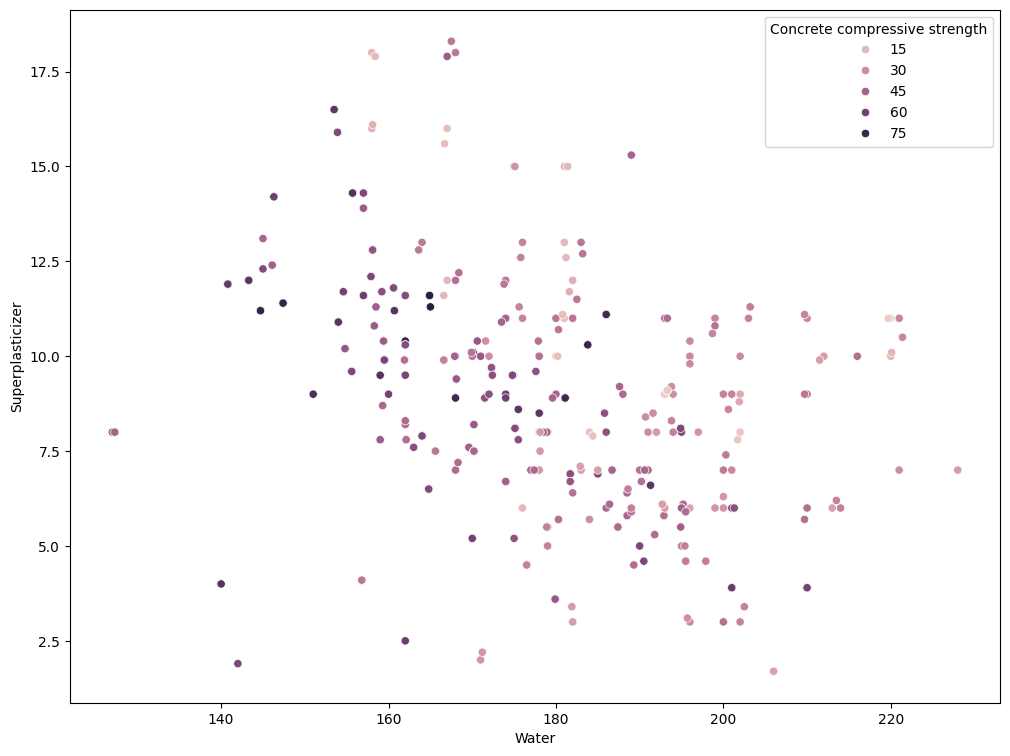

In [90]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=crete_cleaned,
                x='Water',
                y='Superplasticizer',
                hue='Concrete compressive strength')

## Model

In [92]:
crete.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

This is a heatmapf of crete dataset and to show what column would be best to predict for out model

<Axes: >

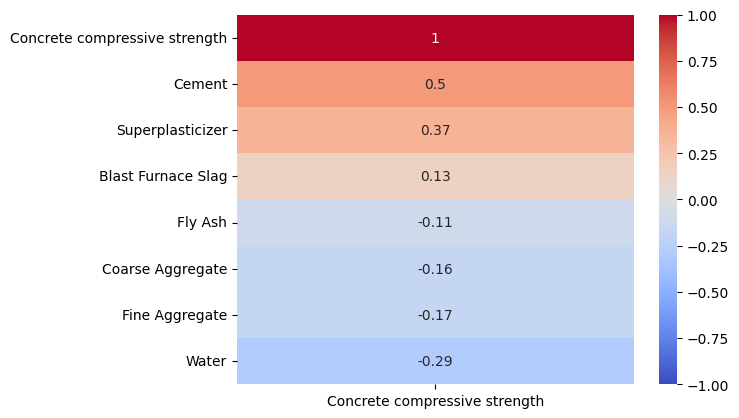

In [94]:
# using a heat map to determine which columns is more useable to run for 'predicting'
sns.heatmap(crete.corr(numeric_only = True)['Concrete compressive strength'].sort_values(ascending = False).to_frame(),
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap = 'coolwarm')

In [95]:
# Declaring X and Y

X= crete[['Cement','Superplasticizer']]
y= crete['Concrete compressive strength']

In [97]:
# Using X and Y split to train and test our data
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)

In [99]:

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

models = {
    'KNeighborsRegressor': KNeighborsRegressor(),
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor()
}

scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    scores[name] = {'train_score': train_score, 'test_score': test_score}
    print(f"{name}:")
    print(f"  Training Accuracy Score: {train_score:.4f}")
    print(f"  Testing Accuracy Score: {test_score:.4f}")
    print("\n")

KNeighborsRegressor:
  Training Accuracy Score: 0.5586
  Testing Accuracy Score: 0.3603


LinearRegression:
  Training Accuracy Score: 0.3485
  Testing Accuracy Score: 0.3584


RandomForestRegressor:
  Training Accuracy Score: 0.6476
  Testing Accuracy Score: 0.3617




## Final Model

In [100]:
# Declaring X and Y

# X = ch[['night_calls','day_calls','intl_charge']]

# X = crete.drop(columns='churn')
# y = crete['churn']
X = crete.drop(columns='Concrete compressive strength')
y = crete['Concrete compressive strength']

In [101]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [102]:
rf = RandomForestRegressor()

In [103]:
rf.fit(X_train_sc,y_train)

RandomForestRegressor()

In [104]:
# Training accuracy score
rf.score(X_train_sc, y_train)

0.6467967796022587

In [105]:
# Testing accuracy score
rf.score(X_test_sc,y_test)

0.3591037930683184

## Pickle Model

In [108]:
# Change the destination
EDA_concrete_pkl_file = '/content/drive/MyDrive/Colab Notebooks/Coding_Labs/Concrete Strength / Lesson/'

# Whatever you call it, you will use it on your docker file
eda_pickel = 'Eda-concrete_pkl_file'

# opening your model
# change out 'lr' for whatever you call your model
with open('Eda-concrete_pkl_file', 'wb') as file:
    model = pickle.dump(model, file)

# loading your model into google colab
# x1 = pickle.load('pkl_file')

# Use to open the Pickel file
# Change 'model' for whatever you call your model
# with open(model, 'rb') as file:
#     model = pickle.load(file)